<a href="https://colab.research.google.com/github/Saeif-Saleh/AppPortfolio/blob/master/BPSK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import scipy.io

In [0]:
first=scipy.io.loadmat('/content/drive/My Drive/first.mat')
second=scipy.io.loadmat('/content/drive/My Drive/second.mat')

In [0]:
nf = np.asarray(first['M'], dtype=np.float64)
sf=np.asarray(second['M'], dtype=np.float64)

In [0]:
import matplotlib.pyplot as plt

In [0]:
#/Loading Data
hckrf1=nf[100000000:101280000]
hckrf2=sf[100000000:101280000]


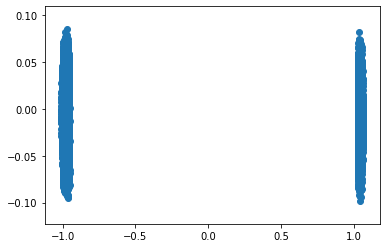

In [8]:

plt.scatter(hckrf1[:,0],hckrf1[:,1])
plt.show()

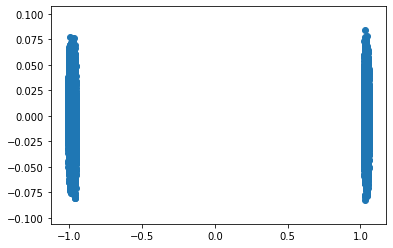

In [9]:
plt.scatter(hckrf2[:,0],hckrf2[:,1])
plt.show()

In [0]:
hckrf1=hckrf1.reshape(-1,128,2)
hckrf2=hckrf2.reshape(-1,128,2)


In [11]:
print(hckrf1[0])

[[ 1.05355406e+00 -9.40179825e-03]
 [-9.98881340e-01  3.25852931e-02]
 [ 1.04675651e+00 -1.77960992e-02]
 [-9.79795635e-01 -1.51116550e-02]
 [-9.69240010e-01 -2.16162205e-03]
 [ 1.04623532e+00 -4.92411852e-03]
 [-9.88880038e-01 -1.23164058e-03]
 [ 1.03559685e+00  9.00286436e-03]
 [-9.70656753e-01  8.28728080e-03]
 [-9.63813663e-01 -1.12418830e-02]
 [ 1.04430437e+00 -9.99450684e-03]
 [-9.91481185e-01 -1.70778930e-02]
 [ 1.04565501e+00  9.43619013e-03]
 [-9.80925977e-01  5.03128767e-03]
 [-9.74196196e-01 -4.40204144e-03]
 [ 1.05532479e+00 -2.25326419e-03]
 [-9.97582018e-01 -3.91837955e-03]
 [ 1.04485118e+00 -2.59678662e-02]
 [-9.78060484e-01  2.69618630e-03]
 [-9.68932748e-01 -4.01985645e-03]
 [ 1.04244864e+00  6.13403320e-03]
 [-9.86461043e-01  3.47969532e-02]
 [ 1.03302169e+00 -8.71935487e-03]
 [-9.73727286e-01 -2.67207921e-02]
 [-9.66191053e-01  8.62658024e-04]
 [ 1.04537296e+00 -4.27553058e-03]
 [-9.95864153e-01  1.01878047e-02]
 [ 1.04395711e+00 -1.61651671e-02]
 [-9.86145258e-01  1

In [12]:
data=np.concatenate((hckrf1,hckrf2),axis=0)
print(data.shape)
print(len(data))

(20000, 128, 2)
20000


In [0]:
data_labels=np.zeros(len(data))
data_labels[0:int(len(data_labels)/2)]=0
data_labels[int(len(data_labels)/2):]=1


In [14]:
from keras.utils import to_categorical
data_labels=to_categorical(data_labels)


Using TensorFlow backend.


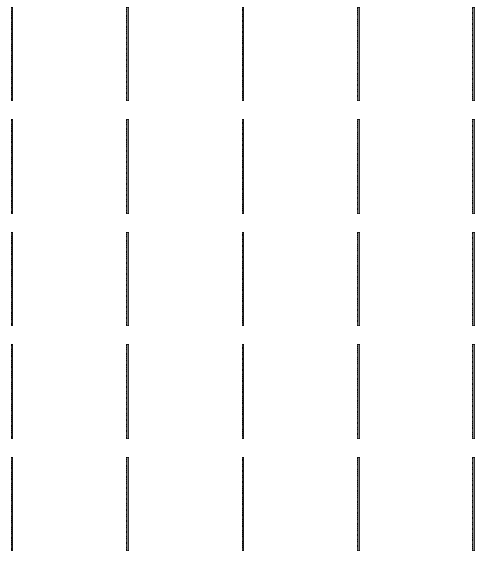

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[i], cmap=plt.cm.binary)

plt.show()

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(128, 2)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
     keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
     keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='softmax')
    
])





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
#Creating Validation Data
data_test1=nf[110000000:111280000]
data_test2=sf[110000000:111280000]
data_for_test=np.concatenate((data_test1,data_test2),axis=0)

data_for_test=data_for_test.reshape(-1,128,2)

In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(data, data_labels, validation_data=(data_for_test,data_labels), epochs=15)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 20000 samples, validate on 20000 samples
Epoch 1/15





20000/20000 [==============================] - 6s 314us/step - loss: 0.7099 - acc: 0.5013 - val_loss: 0.6917 - val_acc: 0.5000
Epoch 2/15
20000/20000 [==============================] - 5s 255us/step - loss: 0.5945 - acc: 0.6508 - val_loss: 0.1692 - val_acc: 0.9685
Epoch 3/15
20000/20000 [==============================] - 5s 250us/step - loss: 0.2426 - acc: 0.9027 - val_loss: 0.0889 - val_acc: 0.9777
Epoch 4/15
20000/20000 [==============================] - 5s 268us/step - loss: 0.2036 - acc: 0.9176 - val_loss: 0.0752 - val_acc: 0.9773
Epoch 5/15
20000/20000 [==============================] - 5s 253us/step - loss: 0.1900 - acc: 0.9248 - val_loss: 0.1071 - val_acc: 0.9721
Epoch 6/15
20000/20000 [==============================] - 5s 253us/step - loss: 0.1886 - acc: 0.9245 - val_loss: 0.1029 - val_acc: 0.9635
Epoch 7/15
20000/2

In [0]:
# #Testing model using normal neural networks
new_test=sf[9000000:9128000]
# new_test=sf[110000000:111280000]
# print(len(new_test))

new_test=new_test.reshape(-1,128,2)
print(new_test.shape)

for img in new_test:
  print(model.predict_classes(img.reshape(-1,128,2)))


In [0]:
img_rows=128
img_cols=2
data = data.reshape(data.shape[0], 1, img_rows, img_cols)
data_for_test = data_for_test.reshape(data_for_test.shape[0], 1, img_rows, img_cols)
input_shape = (1, img_rows, img_cols)

In [43]:
data = data.reshape(data.shape[0], img_rows, img_cols, 1)
data_for_test = data_for_test.reshape(data_for_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

print('data shape:', data.shape) #data shape: (60000, 28, 28, 1)

data shape: (20000, 128, 2, 1)


In [44]:
##model building
conv_model = Sequential()
#convolutional layer with rectified linear unit activation
conv_model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',padding="same",
                 input_shape=input_shape))
#32 convolution filters used each of size 3x3
#again
conv_model.add(Conv2D(64, (3, 3), padding="same",activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
conv_model.add(MaxPooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
conv_model.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
conv_model.add(Flatten())
#fully connected to get all relevant data
conv_model.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
conv_model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
conv_model.add(Dense(2, activation='softmax'))

In [0]:
conv_model.summary()

In [45]:
conv_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
conv_model.fit(data, data_labels, validation_data=(data_for_test,data_labels), epochs=15)

Train on 20000 samples, validate on 20000 samples
Epoch 1/15
20000/20000 [==============================] - 9s 458us/step - loss: 0.6947 - acc: 0.4987 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 2/15
20000/20000 [==============================] - 8s 375us/step - loss: 0.5974 - acc: 0.5996 - val_loss: 0.1080 - val_acc: 0.9571
Epoch 3/15
20000/20000 [==============================] - 8s 377us/step - loss: 0.0760 - acc: 0.9741 - val_loss: 0.0936 - val_acc: 0.9666
Epoch 4/15
20000/20000 [==============================] - 8s 377us/step - loss: 0.0562 - acc: 0.9805 - val_loss: 0.0342 - val_acc: 0.9879
Epoch 5/15
20000/20000 [==============================] - 8s 375us/step - loss: 0.0525 - acc: 0.9816 - val_loss: 0.0814 - val_acc: 0.9708
Epoch 6/15
20000/20000 [==============================] - 8s 375us/step - loss: 0.0506 - acc: 0.9825 - val_loss: 0.0340 - val_acc: 0.9876
Epoch 7/15
20000/20000 [==============================] - 8s 378us/step - loss: 0.0442 - acc: 0.9850 - val_loss: 0.0584 - 

In [0]:
model.summary()

In [0]:
for img in new_test:
   print(model_Conv.predict_classes(img.reshape(1,128,2)))

In [0]:
#Model of paper
# model_Conv = Sequential()
# model_Conv.add(Conv2D(50, (1, 3), activation='relu',input_shape=input_shape))
# model_Conv.add(MaxPooling2D(pool_size=(2, 2)))
# model_Conv.add(Dropout(0.25))
# model_Conv.add(Conv2D(50, (2, 3), activation='relu'))
# model_Conv.add(MaxPooling2D(pool_size=(2, 2)))
# model_Conv.add(Dropout(0.25))
# model_Conv.add(Flatten())
# model_Conv.add(Dense(256, activation='relu'))
# model_Conv.add(Dropout(0.5))
# model_Conv.add(Dense(2, activation='softmax'))

In [0]:
trial=data_for_test[9888:11100]
for img in trial:

  img=(np.expand_dims(img,0))
  print(model.predict_classes(img))